# **Problem Statement:**

Based on customer details, predict whether loan will be approved or not

# **Work Flow:**

1. Data Collection -> Loading the dataset
2. Preprocessing -> missing values, categories to numbers, bringing variables in range 0 to 1
3. Creating training and test set
4. Defining the architecture of the model -> building a neural network using Keras
5. Compiling the model -> (defining loss/cost function, optimizer)
6. Training the model
7. Evaluating model performance -> on both training and test set

In [1]:
# importing the required libaries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Collection**

In [2]:
data = pd.read_csv('Loan_Status.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# shape of the data
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# checking for missing values in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# **Preprocessing**

1. Filling the missing values
2. Converting categories to numbers
3. Bring all the variables in range 0 to 1

In [6]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [7]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [8]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [11]:
# bringing variables in the range 0 to 1
data['ApplicantIncome']=(data['ApplicantIncome']-data['ApplicantIncome'].min())/(data['ApplicantIncome'].max()-data['ApplicantIncome'].min())

In [12]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


# **Creating training and test set**

In [14]:
# removing the loan_ID since these are just the unique values
data = data.iloc[:,1:]

# looking at the shape of the data
data.shape

(614, 12)

In [15]:
# separating the independent and dependent variables

# storing all the independent variables as X
x = data.iloc[:,:-1]

# storing the dependent variable as y
y = data.Loan_Status

In [16]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=data.Loan_Status, test_size=0.2, random_state=10)

In [17]:
print(x.shape, x_train.shape, x_test.shape)

(614, 11) (491, 11) (123, 11)


# **Defining the architecture of the model**

In [18]:
# checking the version of keras
import keras
print(keras.__version__)

2.5.0


In [19]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [20]:
# importing the sequential model
from keras.models import Sequential

In [21]:
# importing different layesrs from keras
from keras.layers import InputLayer, Dense

In [22]:
# number of features in the data
x_train.shape[1]

11

In [23]:
# defining input neurons
input_neurons = x_train.shape[1]

number of output neurons -> since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [24]:
# define number of output neurons
output_neurons = 1

number of hidden layers and hidden neurons -> It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [25]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

activation function of different layers ->  picked relu as an activation function for hidden layers. 
since it is a binary classification problem, sigmoid activation function is used in the final layer

In [26]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [27]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [28]:
# number of parameters between input and first hidden layer
input_neurons*neuron_hidden_layer_1

110

In [29]:
# adding the bias for each neuron of first hidden layer
input_neurons*neuron_hidden_layer_1 + 10

120

In [30]:
# number of parameters between first and second hidden layer
neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [31]:
# number of parameters between second hidden and output layer
neuron_hidden_layer_2*output_neurons + 1

6

# **Compiling the model (defining loss function, optimizer)**

loss as binary_crossentropy -> since we have binary classification problem, defining the optimizer as adam

In [32]:
# Evaluation metric as accuracy
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# **Training the model**

passing the independent and dependent features for training set for training the model -> test data will be evaluated at the end of each epoch -> setting the epochs as 50

In [33]:
# storing the trained model in model_history variable which will be used to visualize the training process
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 14s 39ms/step - loss: 0.6383 - accuracy: 0.6666 - val_loss: 0.6238 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.6489 - val_loss: 0.6157 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.6817 - val_loss: 0.6117 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.6860 - val_loss: 0.6098 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.6933 - val_loss: 0.6087 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.6679 - val_loss: 0.6071 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.6935 - val_loss: 0.6058 - val_accuracy: 0.6911
Epoch 8/50
16/16 [

# **Evaluating model performance on test set**

In [34]:
# getting predictions for the test set
prediction = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
# calculating the accuracy on test set
accuracy_score(y_test, prediction)

0.8130081300813008

# Visualizing the model performance

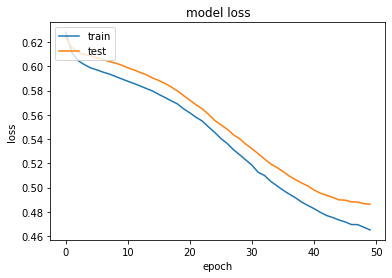

In [36]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

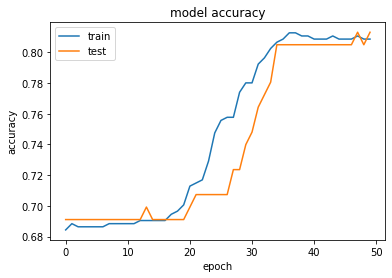

In [37]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()